In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('4 265559.csv')
df.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,92,01-01-2013,25,265559,2,NaN
1,754,02-01-2013,1,265559,36,NaN
2,1780,02-01-2013,2,265559,81,NaN
3,2896,02-01-2013,3,265559,86,NaN
4,4087,02-01-2013,4,265559,110,NaN


In [5]:
df['date'] = df['date'].astype('datetime64[ns]')
df['date'].dtype

dtype('<M8[ns]')

In [6]:
df['Year'] = df['date'].dt.strftime('%Y')

In [7]:
df.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,Year
0,92,2013-01-01,25,265559,2,NaN,2013
1,754,2013-02-01,1,265559,36,NaN,2013
2,1780,2013-02-01,2,265559,81,NaN,2013
3,2896,2013-02-01,3,265559,86,NaN,2013
4,4087,2013-02-01,4,265559,110,NaN,2013


In [8]:
df['month'] = pd.DatetimeIndex(df['date']).month

In [9]:
df.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,Year,month
0,92,2013-01-01,25,265559,2,NaN,2013,1
1,754,2013-02-01,1,265559,36,NaN,2013,2
2,1780,2013-02-01,2,265559,81,NaN,2013,2
3,2896,2013-02-01,3,265559,86,NaN,2013,2
4,4087,2013-02-01,4,265559,110,NaN,2013,2


In [10]:
df['weekday'] = df['date'].dt.dayofweek
df.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,Year,month,weekday
0,92,2013-01-01,25,265559,2,NaN,2013,1,1
1,754,2013-02-01,1,265559,36,NaN,2013,2,4
2,1780,2013-02-01,2,265559,81,NaN,2013,2,4
3,2896,2013-02-01,3,265559,86,NaN,2013,2,4
4,4087,2013-02-01,4,265559,110,NaN,2013,2,4


In [11]:
df_holiday=pd.read_csv('holidays_events.csv')
df_holiday.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [12]:
df1=df['date']
df_holiday['date'] = df_holiday['date'].astype('datetime64[ns]')
df2=df_holiday['date']
df1.dtype

dtype('<M8[ns]')

In [13]:
df_final_holiday=df.set_index(df.date.dt.date).join(df_holiday.set_index('date')).reset_index(drop=True)

In [14]:
df_final_holiday.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,Year,month,weekday,type,locale,locale_name,description,transferred
0,92,2013-01-01,25,265559,2,NaN,2013,1,1,Holiday,National,Ecuador,Primer dia del ano,False
1,1212123,2013-01-02,1,265559,19,NaN,2013,1,2,NaN,NaN,NaN,NaN,NaN
2,1213150,2013-01-02,2,265559,45,NaN,2013,1,2,NaN,NaN,NaN,NaN,NaN
3,1214264,2013-01-02,3,265559,69,NaN,2013,1,2,NaN,NaN,NaN,NaN,NaN
4,1215483,2013-01-02,4,265559,54,NaN,2013,1,2,NaN,NaN,NaN,NaN,NaN


In [15]:
df_final_holiday.to_csv("df_final_holidays.csv")

In [16]:
corr = df_final_holiday.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\MALAV\anaconda3\lib\site-packages\pandas\io\formats\style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\MALAV\anaconda3\lib\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,id,store_nbr,item_nbr,unit_sales,month,weekday
id,1.000000,0.017541,nan,-0.001077,0.019228,0.005202
store_nbr,0.017541,1.000000,nan,0.073010,0.001816,0.000368
item_nbr,nan,nan,nan,nan,nan,nan
unit_sales,-0.001077,0.073010,nan,1.000000,-0.031658,0.033657
month,0.019228,0.001816,nan,-0.031658,1.000000,-0.004024
weekday,0.005202,0.000368,nan,0.033657,-0.004024,1.000000


In [17]:
df_final_holiday.dtypes

id                      int64
date           datetime64[ns]
store_nbr               int64
item_nbr                int64
unit_sales              int64
onpromotion            object
Year                   object
month                   int64
weekday                 int64
type                   object
locale                 object
locale_name            object
description            object
transferred            object
dtype: object

In [18]:
df_final_holiday['Year'] = df_final_holiday['Year'].apply(pd.to_numeric)
#df_final_holiday['Year'].astype(int)

In [19]:
corr = df_final_holiday.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,store_nbr,item_nbr,unit_sales,Year,month,weekday
id,1.000000,0.017541,nan,-0.001077,0.973280,0.019228,0.005202
store_nbr,0.017541,1.000000,nan,0.073010,0.016946,0.001816,0.000368
item_nbr,nan,nan,nan,nan,nan,nan,nan
unit_sales,-0.001077,0.073010,nan,1.000000,0.002946,-0.031658,0.033657
Year,0.973280,0.016946,nan,0.002946,1.000000,-0.092620,0.005800
month,0.019228,0.001816,nan,-0.031658,-0.092620,1.000000,-0.004024
weekday,0.005202,0.000368,nan,0.033657,0.005800,-0.004024,1.000000


In [20]:
df_final_holiday['type'] = df_final_holiday['type'].replace(['Holiday', 'Work Day', 'Additional', 'Event', 'Transfer', 'Bridge'], ['1', '0', '1', '1', '1', '1'])
#df_final_holiday['type'].astype(int)

In [21]:
df_final_holiday['type'].astype(np.float).astype("Int32")

0           1
1        <NA>
2        <NA>
3        <NA>
4        <NA>
         ... 
84601       1
84602       1
84603       1
84604       1
84605       1
Name: type, Length: 84606, dtype: Int32

In [23]:
df_final_holiday['day']=df_final_holiday['date'].dt.day

In [25]:
df_final={
    'date':df_final_holiday['date'], 
    'unit_sales':df_final_holiday['unit_sales'],
    'onpromotion':df_final_holiday['onpromotion'],
    'weekday':df_final_holiday['weekday'],
    'type':df_final_holiday['type'],
    'year':df_final_holiday['Year'],
    'day':df_final_holiday['day']
}
data = pd.DataFrame(df_final)

In [26]:
data.tail()

,date,unit_sales,onpromotion,weekday,type,year,day
84601,2017-12-08,51,False,4,1,2017,8
84602,2017-12-08,97,False,4,1,2017,8
84603,2017-12-08,97,False,4,1,2017,8
84604,2017-12-08,17,False,4,1,2017,8
84605,2017-12-08,17,False,4,1,2017,8


<AxesSubplot:>

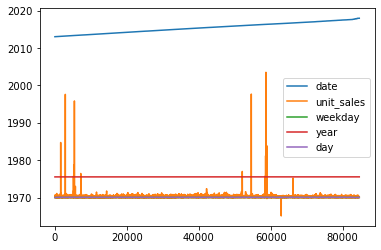

In [27]:
data.plot()

In [28]:
data2 = data.copy()

In [29]:
data2.index = data.date

In [30]:
data2['type'].astype(np.float).astype("Int32")

date
2013-01-01       1
2013-01-02    <NA>
2013-01-02    <NA>
2013-01-02    <NA>
2013-01-02    <NA>
              ... 
2017-12-08       1
2017-12-08       1
2017-12-08       1
2017-12-08       1
2017-12-08       1
Name: type, Length: 84606, dtype: Int32

In [31]:
data2.dtypes

date           datetime64[ns]
unit_sales              int64
onpromotion            object
weekday                 int64
type                   object
year                    int64
day                     int64
dtype: object

In [32]:
data_13_16=data2['2013':'2016']

In [33]:
data_13_16.tail()

,date,unit_sales,onpromotion,weekday,type,year,day
date,,,,,,,
2016-12-31,2016-12-31,66,True,5,1,2016,31
2016-12-31,2016-12-31,46,True,5,1,2016,31
2016-12-31,2016-12-31,35,False,5,1,2016,31
2016-12-31,2016-12-31,88,False,5,1,2016,31
2016-12-31,2016-12-31,15,False,5,1,2016,31


In [34]:
data_13_16.to_csv("data_13_16.csv")

In [ ]:
data_13_16.tail()

In [51]:
x={'date':data_13_16['date'], 'onpromotion':data_13_16['onpromotion'], 'weekday':data_13_16['weekday'], 'type':data_13_16['type'], 'year':data_13_16['year'],'day':data_13_16['day']}
x_data = pd.DataFrame(x)
y={'unit_sales':data_13_16['unit_sales']}
y_data = pd.DataFrame(y)
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [96]:
y_data.min()

unit_sales    0
dtype: int64

In [97]:
y_data.replace(-1797,0,inplace=True)
y_data.replace(-107,0,inplace=True)

In [98]:
x_data.shape

(72344, 6)

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
reggressor=RandomForestRegressor(n_estimators=10, random_state=0)

In [102]:
y_train.head()

,unit_sales
date,
2013-01-16,43
2016-10-21,5
2016-12-24,57
2013-09-12,9
2016-05-12,8


In [103]:
reggressor.fit(x_train.iloc[:,1:].fillna(0), y_train)

C:\Users\MALAV\AppData\Local\Temp\ipykernel_14828\3401013996.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reggressor.fit(x_train.iloc[:,1:].fillna(0), y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [104]:
y_pred=reggressor.predict(x_test.iloc[:,1:].fillna(0))

In [105]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
#print('Mean Squared Error:', metrics.mean_squared)

Mean Absolute Error: 29.748186988920054


In [106]:
x_data['onpromotion'] = x_data['onpromotion'].fillna(0)
x_data['type'] = x_data['type'].fillna(0)

In [107]:
x_data["onpromotion"] = pd.to_numeric(x_data["onpromotion"])
x_data["type"] = pd.to_numeric(x_data["type"])

In [108]:
x_data.dtypes

date           datetime64[ns]
onpromotion             int64
weekday                 int64
type                    int64
year                    int64
day                     int64
dtype: object

In [109]:
print(len(y_pred))
print(y_test.shape)

14469
(14469, 1)


In [110]:
y_pred_df  = pd.DataFrame(data = y_pred, index = y_test.index)

<AxesSubplot:xlabel='date'>

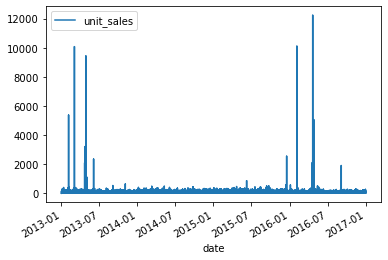

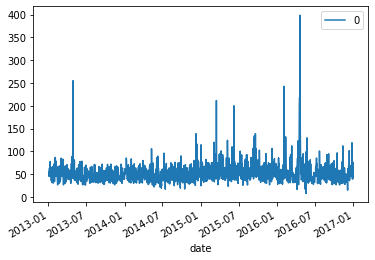

In [111]:
y_data.plot()
y_pred_df.plot()
#plt.plot(y_pred)

# SARIMAX